In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
random.seed(0)

In [33]:
n = 4 # size of individual
m = 600 # size of population
n_generations = 100 # Number of generations
losses = [] # Lưu giá trị để vẽ biểu đồ
best_individual = None
X = None
y = None

def load_data_from_file(filename = 'advertising.csv'):
    global X, y
    data = np.genfromtxt(filename, dtype=float, delimiter=',', skip_header=1)
    X = np.array(data[:, :3])
    y = np.array(data[:, -1])

    X = np.hstack([np.ones((X.shape[0], 1)), X])

def create_random_value(range=5):
    return (random.random()*2 - 1)*range

def create_random_individual():
    return [create_random_value() for _ in range(n)]

def create_random_population():
    return [create_random_individual() for _ in range(m)]

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = np.dot(X, theta)
    loss = ((y - y_hat)**2).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1e-9)
    return fitness

def selection(sorted_population): # population đã sort tăng dần
    # Chọn 2 thằng ngẫu nhiên, lấy thằng fitness cao
    cand1 = random.randint(0, m - 1)
    cand2 = random.randint(0, m - 1)
    while cand1 == cand2:
        cand2 = random.randint(0, m - 1)

    final_cand = cand1 if cand1 > cand2 else cand2
    return sorted_population[final_cand]

def crossover(individual1, individual2, crossover_rate=0.9):
    indi1_copy = copy.copy(individual1)
    indi2_copy = copy.copy(individual2)

    for i in range(n):
        if random.random() < crossover_rate:
            indi1_copy[i] = individual2[i]
            indi2_copy[i] = individual1[i]

    return indi1_copy, indi2_copy

def mutation(individual, mutation_rate=0.05):
    indi_copy = copy.copy(individual)
    for i in range(n):
        if random.random() < mutation_rate:
            indi_copy[i] = create_random_value() 

    return indi_copy

def create_new_population(sorted_old_population, elitism=2):

    new_population = sorted_old_population[-elitism:] # Đặt cách 1 số thằng top từ population cũ

    # Lặp cho đến khi population mới đủ thành viên 
    while len(new_population) < m:
        # Selection: Chọn 1 đôi từ population cũ
        cand1 = selection(sorted_old_population)
        cand2 = selection(sorted_old_population)

        # Crossover
        cand1, cand2 = crossover(cand1, cand2)

        # Mutation
        cand1 = mutation(cand1)
        cand2 = mutation(cand2)

        # Đem bỏ vào population mới
        new_population.append(cand1)
        new_population.append(cand2)

    return new_population


def start_trainning():
    global best_individual
    
    load_data_from_file('advertising.csv')

    old_population = create_random_population()

    for i in range(n_generations):
        new_population = create_new_population(old_population)
        sorted_new_population = sorted(new_population, key=compute_fitness)

        # Log
        losses.append(compute_loss(sorted_new_population[-1]))

        old_population = sorted_new_population

    best_individual = old_population[-1]

start_trainning()

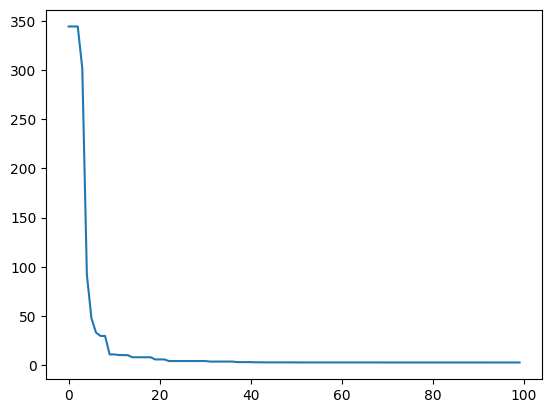

The best individual is: 
[4.074952888884259, 0.056919262895402944, 0.12564149668256697, -0.00766811830024583]
2.8255669876450815


In [34]:
# Graph kết quả
plt.plot(losses)
plt.show()
# Cá thể tốt nhất là 
print("The best individual is: ")
print(best_individual)
# Loss bé nhất là 
print(compute_loss(best_individual))

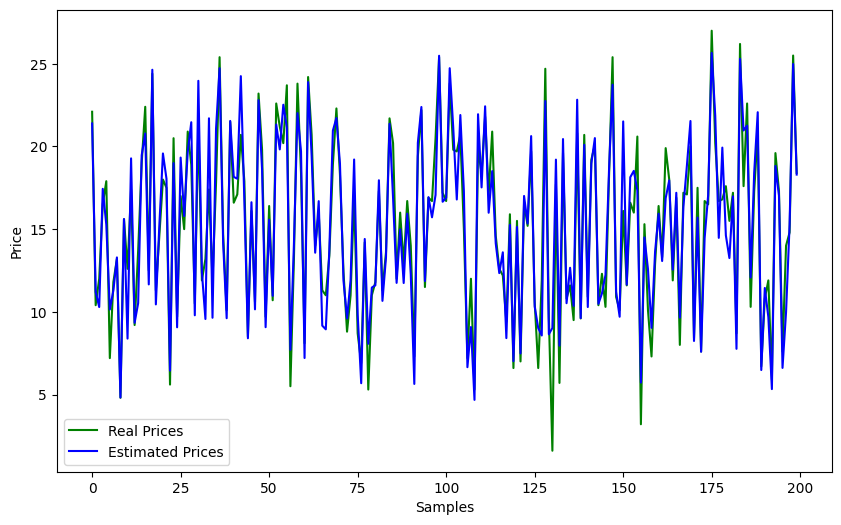

In [35]:
# So sánh với kết quả thực tế
def visualize_predict_gt () :
    theta = np.array(best_individual)
    estimated_prices = []
    for feature in X :
        # ************* your code here *************
        estimated_prices.append(np.dot(feature, theta))
    fig , ax = plt . subplots (figsize =(10 , 6) )
    plt . xlabel ( 'Samples')
    plt . ylabel ( 'Price')
    plt . plot ( y , c = 'green', label = 'Real Prices')
    plt . plot ( estimated_prices , c = 'blue', label ='Estimated Prices')
    plt . legend ()
    plt . show ()
visualize_predict_gt ()